<a href="https://colab.research.google.com/github/FelixMaturano/C---TODO/blob/master/Regresion_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO_1 SIS 420
_Nombre_: Felix Maturano Zarate
#CU:111-531
Carrera: Ing. Ciencias de la Computación


# Ejercicio de programacion Regresion Lineal
En este cuadernillo, se realizará un análisis de regresión lineal utilizando un dataset proporcionado (Advertising.csv). El objetivo es ajustar un modelo de regresión lineal y evaluar su rendimiento a través de la minimización del costo. El dataset contiene información sobre inversiones en publicidad y sus efectos en las ventas.

In [ ]:
# utilizando para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficacion (trazado de graficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D # Necesario pra graficar superficies 3D
import matplotlib.pyplot as plt

# Llama a matplotlib a embeber graficos dentro de los cuadernillos
%matplotlib inline

from sklearn.model_selection import train_test_split  # Asegurarse de que esta línea esté incluida

# 1 Regresion lineal con una variable
# Dataset: Publicidad y Ventas
El archivo 'Advertising.csv' contiene el dataset para el problema de regresion lineal multiple. Este dataset incluye informacion sobre la inversion en publicidad y su impacto en la ventas. Las columnas del dataset son las siguientes:
  1. TV: inversion en publicidad en radio(en miles de dolares)
  2. Radio: Inversión en publicidad en radio (en miles de dólares).
  3. Newspaper: Inversión en publicidad en periódicos (en miles de dólares).
  4. Sales: Ventas del producto (en miles de unidades).
  Este dataset su puede utilizar para predecir las ventas basadas en las inversiones en diferentes medios publicitarios.

#Cargar el Dataset
Montamos Google Drive para acceder al archivo del dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Leer datos separados por una coma usando pandas
data = pd.read_csv('/content/drive/MyDrive/IA/Advertising.csv')

# # Si quieres extraer las columnas como arrays de numpy:
# X, y = data.iloc[:, 0].values, data.iloc[:, 1].values  # Extracción usando pandas y conversión a numpy

# m = y.size  # m = numero de ejemplos de entrenamiento
# Revisar los primeros registros del dataset
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# Preprocesamiento de los Datos
Separar las caracteristicas (X) y la variable objetivo (y), y normalizar las caracteristicas.

In [ ]:
# Separar las caracteristicas y variable objetivo
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values
m = len(y)  # Número de ejemplos de entrenamiento

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizar las características usando solo datos de entrenamiento
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Agregar una columna de unos para el término de sesgo
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Implementacion de la Regresion Lineal
Definir las funciones necesarias para calcular el costo y realizar el descenso por gradiente.

In [ ]:
# Implementación de la Regresión Lineal
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * len(y))) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    costs = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        updates = (alpha / len(y)) * X.T.dot(errors)
        theta = theta - updates
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

# Ejecutar el descenso por el gradiente
theta, costs = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Visualizacion de Resultados
Mostrar los parametros ajustados y graficar la convergencia del costo.

Parámetros ajustados: [14.21688621  3.77528302  2.88450292 -0.05723291]


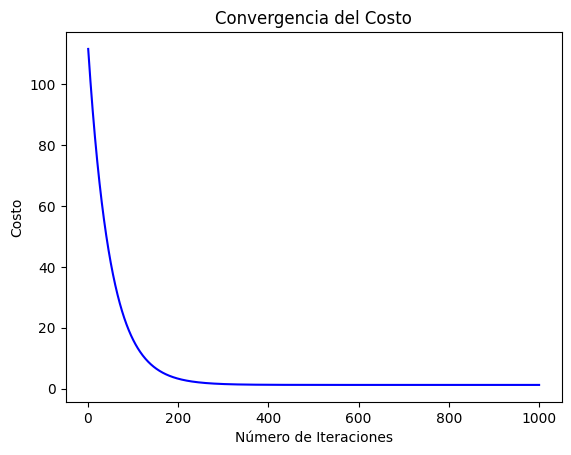

In [ ]:
# Mostrar los parámetros ajustados
print(f"Parámetros ajustados: {theta}")

# Graficar la convergencia del costo
plt.plot(range(1, len(costs) + 1), costs, 'b-')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Convergencia del Costo')
plt.show()

# Evaluacion del modelo
Usar la division en conjuntos de entrenamiento y prueba para evaluar el modelo.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
predictions = X_test.dot(theta)
mse = np.mean(np.square(predictions - y_test))
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

Error cuadrático medio en el conjunto de prueba: 4.400538927107332
